# Number Recognition

Importing Libraries

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

Loading and Preprocessing the dataset

In [2]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Augmentating the data

In [3]:
# datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
# datagen.fit(X_train)

Defining the Convolutional Neural Network Architecture

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

Model Compilation and Training

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.1)

Epoch 1/10
844/844 [==============================] - 35s 40ms/step - loss: 0.2021 - accuracy: 0.9386 - val_loss: 0.0555 - val_accuracy: 0.9845
Epoch 2/10
844/844 [==============================] - 41s 48ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0377 - val_accuracy: 0.9885
Epoch 3/10
844/844 [==============================] - 34s 41ms/step - loss: 0.0377 - accuracy: 0.9879 - val_loss: 0.0447 - val_accuracy: 0.9875
Epoch 4/10
844/844 [==============================] - 37s 44ms/step - loss: 0.0284 - accuracy: 0.9910 - val_loss: 0.0405 - val_accuracy: 0.9888
Epoch 5/10
844/844 [==============================] - 36s 43ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0374 - val_accuracy: 0.9898
Epoch 6/10
844/844 [==============================] - 38s 45ms/step - loss: 0.0199 - accuracy: 0.9934 - val_loss: 0.0275 - val_accuracy: 0.9927
Epoch 7/10
844/844 [==============================] - 35s 41ms/step - loss: 0.0157 - accuracy: 0.9949 - val_loss: 0.0346 - val_accuracy:

Evaluating the Model

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

313/313 [==============================] - 2s 7ms/step - loss: 0.0355 - accuracy: 0.9901
Test accuracy: 0.9901000261306763


Visualizing the performance of the model

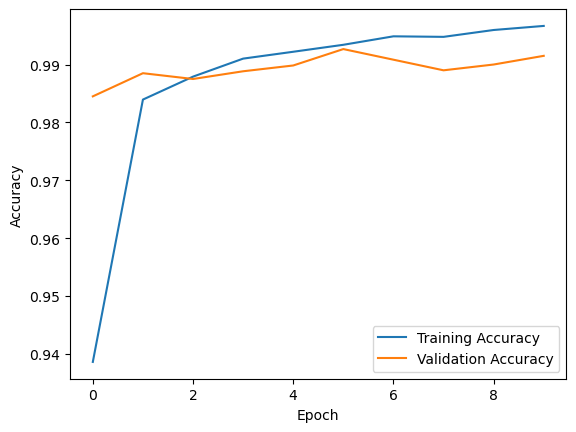

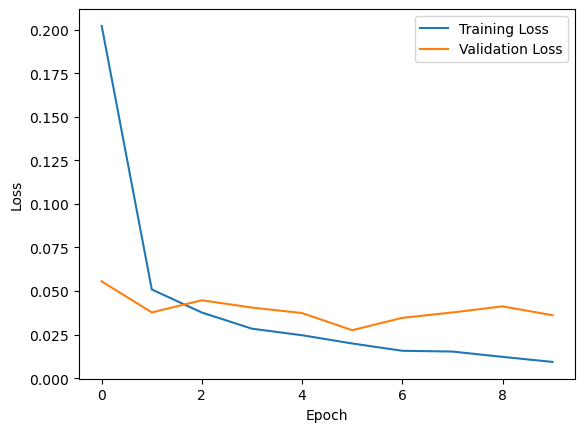

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model.save('mnist_digit_recognition_model.h5')

loaded_model = tf.keras.models.load_model('mnist_digit_recognition_model.h5')

C:\Users\oscur\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Making a prediction used the trained model

In [9]:
new_image = test_images[0]  
new_image = new_image.reshape((1, 28, 28, 1))


In [10]:
prediction = loaded_model.predict(new_image)


predicted_digit = tf.argmax(prediction, axis=1).numpy()[0]

print("Predicted Digit:", predicted_digit)


1/1 [==============================] - 0s 140ms/step
Predicted Digit: 7
